## 219. 存在重复元素 II
给定一个整数数组和一个整数 k，判断数组中是否存在两个不同的索引 i 和 j，使得 nums [i] = nums [j]，并且 i 和 j 的差的 绝对值 至多为 k。

示例 1:
```
输入: nums = [1,2,3,1], k = 3
输出: true
```
示例 2:
```
输入: nums = [1,0,1,1], k = 1
输出: true
```
示例 3:
```
输入: nums = [1,2,3,1,2,3], k = 2
输出: false
````

### 标签：哈希
维护一个哈希表，里面始终最多包含 k 个元素，当出现重复值时则说明在 k 距离内存在重复元素

每次遍历一个元素则将其加入哈希表中，如果哈希表的大小大于 k，则移除最前面的数字

时间复杂度：$O(n)$，$n$ 为数组长度

空间复杂度：$O(\min(n, k))$

开辟的额外空间取决于散列表中存储的元素的个数，也就是滑动窗口的大小 $O(\min(n,k))$。



In [36]:
from typing import List

class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        hash_num = {}
        for i in range(len(nums)):
            if len(list(hash_num.keys())) > k:
                hash_num.pop(list(hash_num.keys())[0])
            if nums[i] in list(hash_num.values()):
                return True
            hash_num[i] = nums[i]
        return False
                    

In [38]:
from typing import List

class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        arr = {}
        for i in range(len(nums)):
            if nums[i] in arr and i - arr[nums[i]] <= k: return True
            arr[nums[i]] = i
        return False

In [39]:
ss = Solution()
res = ss.containsNearbyDuplicate(nums=[1,0,1,1], k=1)
print(res)

True


## 220. 存在重复元素 III

给你一个整数数组 `nums` 和两个整数 `k` 和 `t` 。请你判断是否存在 两个不同下标 `i` 和 `j`，使得 `abs(nums[i] - nums[j]) <= t` ，同时又满足 `abs(i - j) <= k` 

如果存在则返回 true，不存在返回 false。

 

示例 1：
```
输入：nums = [1,2,3,1], k = 3, t = 0
输出：true
```
示例 2：
```
输入：nums = [1,0,1,1], k = 1, t = 2
输出：true
```
示例 3：
```
输入：nums = [1,5,9,1,5,9], k = 2, t = 3
输出：false
``` 

提示：
```
0 <= nums.length <= 2 * 104
-231 <= nums[i] <= 231 - 1
0 <= k <= 104
0 <= t <= 231 - 1
```

### 滑动窗口 & 二分
根据题意，对于任意一个位置 i（假设其值为 u），我们其实是希望在下标范围为 `[max(0, i - k)` 内找到值范围在 `[u - t, u + t]` 的数。

朴素的想法: 每次遍历到任意位置 i 的时候，往后检查 k 个元素，但复杂度是 $O(nk)$ 的，会超时。

显然我们需要优化「检查后面 k 个元素」这一过程。

我们希望使用一个「有序集合」去维护长度为 k 的滑动窗口内的数，该数据结构最好支持高效「查询」与「插入/删除」操作：

- 查询：能够在「有序集合」中应用「二分查找」，快速找到「小于等于 uu 的最大值」和「大于等于 u 的最小值」（即「有序集合」中的最接近 u 的数）。
- 插入/删除：在往「有序集合」添加或删除元素时，能够在低于线性的复杂度内完成（维持有序特性）。

HashMap 无法很好的支持「范围查询」操作:我们需要找的是符合 $abs(nums[i], nums[j]) \leqslant tabs(nums[i],nums[j])⩽t$ 的两个值，`nums[i]` 与 `nums[j]` 并不一定相等，而 

#### 『树』结构。

例如 AVL，能够让我们在最坏为 $O(\log{k})$ 的复杂度内取得到最接近 u 的值是多少，但本题除了「查询」以外，还涉及频繁的「插入/删除」操作（**随着我们遍历 nums 的元素，滑动窗口不断右移，我们需要不断的往「有序集合」中删除和添加元素**）。

简单采用 AVL 树，会导致每次的插入删除操作都触发 AVL 的平衡调整，一次平衡调整会伴随着若干次的旋转。

而红黑树则很好解决了上述问题：将平衡调整引发的旋转的次数从「若干次」限制到「最多三次」。

因此，当「查询」动作和「插入/删除」动作频率相当时，更好的选择是使用「红黑树」。


### 红黑树
每个节点都带有颜色属性的二叉查找树，颜色为红色或黑色；可以在O(log n) 时间内做查找，插入和删除

红黑树相对于AVL树来说，牺牲了部分平衡性以换取插入/删除操作时少量的旋转操作，整体来说性能要优于AVL树。

**性质**：
1. 节点是红色或黑色。
2. 根是黑色。
3. 所有叶子都是黑色（叶子是NIL节点）。
4. 每个红色节点必须有两个黑色的子节点。（从每个叶子到根的所有路径上不能有两个连续的红色节点。）
5. 从任一节点到其每个叶子的所有简单路径都包含相同数目的黑色节点。
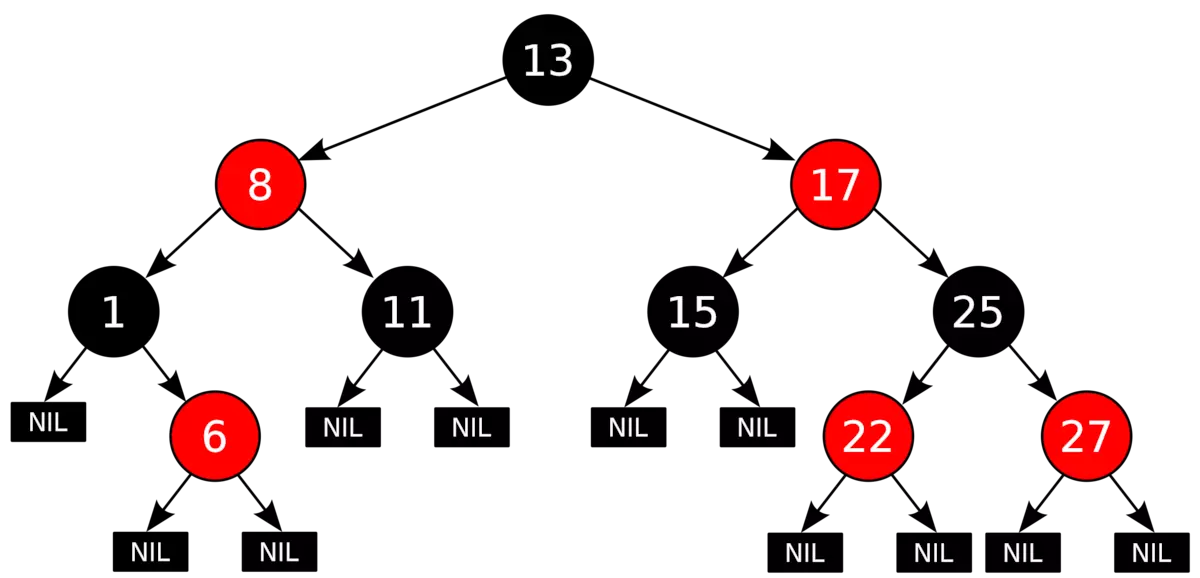

这些约束确保了红黑树的关键特性：

**从根到叶子的最长的可能路径不多于最短的可能路径的两倍长。（大致上平衡）**

在很多树数据结构的表示中，一个节点有可能只有一个子节点，而叶子节点包含数据。用这种范例表示红黑树是可能的，但是这会改变一些性质并使算法复杂。为此，本文中我们使用"nil叶子"或"空（null）叶子"，如上图所示，它不包含数据而只充当树在此结束的指示。
**与此有关的结论是所有节点都有两个子节点，尽管其中的一个或两个可能是空叶子。**

#### 查找操作
- 黑树上的只读操作与普通二叉查找树上的只读操作相同； 
- 在红黑树上进行插入操作和删除操作会导致不再匹配红黑树的性质。恢复红黑树的性质需要少量O(log n)的颜色变更和不超过三次树旋转（对于插入操作是两次）

#### 插入操作
1. 增加新节点并标记它为红色
2. 颜色调换和树旋转 (设为红色节点后，可能会导致出现两个连续红色节点的冲突
3. 性质1和性质3总是保持着，不会被破坏。
   <br/>性质4只在增加红色节点、重绘黑色节点为红色，或做旋转时可能被破坏。 
   <br/>性质5只在增加黑色节点、重绘红色节点为黑色，或做旋转时可能被破坏。
   
#### 删除操作


In [43]:
from sortedcontainers import SortedList
from typing import List
import bisect

class Solution:
    def containsNearbyAlmostDuplicate(self, nums: List[int], k: int, t: int) -> bool:
        window = SortedList()
        for i in range(len(nums)):
            # len(window) == k
            if i > k:
                window.remove[i - k - 1]
            window.add(nums[i])
            idx = bisect.bisect_left(window, nums[i])
            if idx > 0 and abs(window[idx] - window[idx-1]) <= t:
                return True
            if idx < len(window) - 1 and abs(window[idx+1] - window[idx]) <= t:
                return True
        return False

In [44]:
ss = Solution()
res = ss.containsNearbyAlmostDuplicate(nums=[1,2,3,1], k = 3, t = 0)
print(res)

False


- 时间复杂度：TreeSet 基于红黑树，查找和插入都是 $O(\log{k})$ 复杂度。整体复杂度为 $O(n\log{k})$
- 空间复杂度：$O(k)$


### 2.桶排序
上述解法无法做到线性的原因是：我们需要在大小为 $k$ 的滑动窗口所在的「有序集合」中找到与 $u$ 接近的数。

如果我们能够将 k 个数字分到 $k$ 个桶的话，那么我们就能 $O(1)$ 的复杂度确定是否有 $[u - t, u + t]$ 的数字（检查目标桶是否有元素）。

具体的做法为：令桶的大小为 $size=t+1$，根据 $u$ 计算所在桶编号：

- 如果已经存在该桶，说明前面已有 $[u - t, u + t]$ 范围的数字，返回 true
- 如果不存在该桶，则检查相邻两个桶的元素是有 $[u - t, u + t]$ 范围的数字，如有 返回 true
- 建立目标桶，并删除下标范围不在 $[max(0, i - k), i)$ 内的桶


In [ ]:
...#TODO: to be finished...........

## 26. 删除有序数组中的重复项
给你一个有序数组 nums ，请你 原地 删除重复出现的元素，使每个元素 只出现一次 ，返回删除后数组的新长度。

不要使用额外的数组空间，你必须在 原地 修改输入数组 并在使用 O(1) 额外空间的条件下完成。


说明:

为什么返回数值是整数，但输出的答案是数组呢?

请注意，输入数组是以「引用」方式传递的，这意味着在函数里修改输入数组对于调用者是可见的。

你可以想象内部操作如下:
```
// nums 是以“引用”方式传递的。也就是说，不对实参做任何拷贝
int len = removeDuplicates(nums);

// 在函数里修改输入数组对于调用者是可见的。
// 根据你的函数返回的长度, 它会打印出数组中 该长度范围内 的所有元素。
for (int i = 0; i < len; i++) {
    print(nums[i]);
}
```
 
示例 1：
```
输入：nums = [1,1,2]
输出：2, nums = [1,2]
解释：函数应该返回新的长度 2 ，并且原数组 nums 的前两个元素被修改为 1, 2 。不需要考虑数组中超出新长度后面的元素。
```
示例 2：
```
输入：nums = [0,0,1,1,1,2,2,3,3,4]
输出：5, nums = [0,1,2,3,4]
解释：函数应该返回新的长度 5 ， 并且原数组 nums 的前五个元素被修改为 0, 1, 2, 3, 4 。不需要考虑数组中超出新长度后面的元素。
``` 

提示：
```
0 <= nums.length <= 3 * 104
-10^4 <= nums[i] <= 10^4
nums 已按升序排列
``` 


In [10]:
from typing import List
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        def solve(k):
            u = 0
            for i in range(len(nums)):
                if i < k or nums[i-k] != nums[i]:
                    nums[u] = nums[i]
                    u += 1
            return u
        return solve(1)

### Double pointers
首先注意数组是有序的，那么重复的元素一定会相邻。要求删除重复元素，实际上就是将不重复的元素移到数组的左侧。

**比较 p 和 q 位置的元素是否相等**

- 如果相等，q 后移 1 位
- 如果不相等，将 q 位置的元素复制到 p+1 位置上，p 后移一位，q 后移 1 位
- 重复上述过程，直到 q 等于数组长度。
- 返回 p + 1，即为新数组长度。


In [12]:
from typing import List
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        p, q = 0, 1
        while q < len(nums):
            if nums[p] == nums[q]:
                q += 1
            else:
                nums[p+1] = nums[q]
                p += 1
                q += 1
        return p + 1

In [14]:
ss = Solution()
res1 = ss.removeDuplicates(nums = [0,0,1,1,1,2,2,3,3,4])
res2 = ss.removeDuplicates(nums = [1])
print(res1)
print(res2)

5
1


## 80. 删除有序数组中的重复项 II
给你一个有序数组 nums ，请你 原地 删除重复出现的元素，使每个元素 最多出现两次 ，返回删除后数组的新长度。

不要使用额外的数组空间，你必须在 原地 修改输入数组 并在使用 O(1) 额外空间的条件下完成。


说明：

为什么返回数值是整数，但输出的答案是数组呢？

请注意，输入数组是以「**引用**」方式传递的，这意味着在函数里修改输入数组对于调用者是可见的。

你可以想象内部操作如下:
```
// nums 是以“引用”方式传递的。也就是说，不对实参做任何拷贝
int len = removeDuplicates(nums);

// 在函数里修改输入数组对于调用者是可见的。
// 根据你的函数返回的长度, 它会打印出数组中 该长度范围内 的所有元素。
for (int i = 0; i < len; i++) {
    print(nums[i]);
}
```

示例 1：
```
输入：nums = [1,1,1,2,2,3]
输出：5, nums = [1,1,2,2,3]
解释：函数应返回新长度 length = 5, 并且原数组的前五个元素被修改为 1, 1, 2, 2, 3 。 不需要考虑数组中超出新长度后面的元素。
```
示例 2：
```
输入：nums = [0,0,1,1,1,1,2,3,3]
输出：7, nums = [0,0,1,1,2,3,3]
解释：函数应返回新长度 length = 7, 并且原数组的前五个元素被修改为 0, 0, 1, 1, 2, 3, 3 。 不需要考虑数组中超出新长度后面的元素。
```

提示：
```
1 <= nums.length <= 3 * 104
-104 <= nums[i] <= 104
nums 已按升序排列
```

### 通用解法
将原问题的「保留 2 位」修改为「保留 k 位」

- 由于是保留 k 个相同数字，对于前 k 个数字，我们可以直接保留
- 对于后面的任意数字，能够保留的前提是：与当前写入的位置前面的第 k 个元素进行比较，不相同则保留

我们令 k=2，假设有如下样例
```
[1,1,1,1,1,1,2,2,2,2,2,2,3]
```
- 首先我们先让前 2 位直接保留，得到 1,1
- 对后面的每一位进行继续遍历，能够保留的前提是与当前位置的前面 k 个元素不同（答案中的第一个 1），因此我们会跳过剩余的 1，将第一个 2 追加，得到 1,1,2
- 继续这个过程，这时候是和答案中的第 2 个 1 进行对比，因此可以得到 1,1,2,2
- 这时候和答案中的第 1 个 2 比较，只有与其不同的元素能追加到答案，因此剩余的 2 被跳过，3 被追加到答案：1,1,2,2,3


In [7]:
from typing import List

class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        def solve(k):
            u = 0
            for x in nums:
                if u < k or nums[u-k] != x:
                    nums[u] = x
                    u += 1
            return u
        return solve(2)

In [8]:
ss = Solution()
nums = [1,1,1,2,2,3]
res = ss.removeDuplicates(nums)
nums2 = [0,0,1,1,2,3,3]
res2 = ss.removeDuplicates(nums2)
print(res)
print(res2)

5
7


## 395. 至少有 K 个重复字符的最长子串

给你一个字符串 s 和一个整数 k ，请你找出 s 中的最长子串， 要求该子串中的每一字符出现次数都不少于 k 。返回这一子串的长度。

 

示例 1：
```
输入：s = "aaabb", k = 3
输出：3
解释：最长子串为 "aaa" ，其中 'a' 重复了 3 次。
```

示例 2：
```
输入：s = "ababbc", k = 2
输出：5
解释：最长子串为 "ababb" ，其中 'a' 重复了 2 次， 'b' 重复了 3 次。
 ```

提示：

- 1 <= s.length <= 104
- s 仅由小写英文字母组成
- 1 <= k <= 105

### 解题思路

#### 递归
**重点：我们在调用递归函数的时候，把递归函数当做普通函数（黑箱）来调用，即明白该函数的输入输出是什么，而不用管此函数内部在做什么。**

1. 递归最基本的是**记住递归函数的含义**：本题的 `longestSubstring(s, k)` 函数表示的就是题意
  - 函数入参 $s$ 是表示源字符串；$k$ 是子字符串中每个字符最少出现的次数；
  - 函数返回结果是满足题意的最长子字符串长度。

2. 递归的**终止条件**（能直接写出的最简单 case）：如果字符串 $s$ 的长度少于 $k$，那么一定不存在满足题意的子字符串，返回 0；

3. **调用递归（重点）**：如果一个字符 $c$ 在 $s$ 中出现的次数少于 $k$ 次，那么 $s$ 中所有的包含 $c$ 的子字符串都不能满足题意。

 - 首先，应该在 $s$ 的所有不包含 $c$ 的子字符串中继续寻找结果：把 $s$ 按照 $c$ 分割（分割后每个子串都不包含 $c$），得到很多子字符串 $t$；
 - 下一步，$t$ 作为源字符串的时候，我们把大问题分割为了小问题($s$ → $t$)。此时我们发现，恰好已经定义了函数 `longestSubstring(s, k)` ; 所以直接调用 `longestSubstring(s, k)`，形成递归。

4. 未进入递归时的返回结果：如果 $s$ 中的每个字符出现的次数都大于 $k$ 次，那么 $s$ 就是我们要求的字符串，直接返回该字符串的长度。


In [5]:
from typing import List

class Solution:
    def longestSubstring(self, s: str, k: int) -> int:
        if len(s) < k: return 0
        for c in set(s):
            if s.count(c) < k:
                return max(self.longestSubstring(t, k) for t in s.split(c))
        return len(s)

In [8]:
s1, s2 = "aaabb", "ababbc"
k1, k2 = 3, 2
ss = Solution()
o1 = ss.longestSubstring(s1, k1)
o2 = ss.longestSubstring(s2, k2)
print(o1)
print(o2)

3
5
